# Visualization of the Gaussian Filtering Operation

In [1]:
# Import necessary modules
from pathlib import Path
from src.data import generateData
from src.features import helpers as hp
from src.visualization import helpers as hpVis
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
from scipy.ndimage import gaussian_filter1d


ROOT = Path(os.getcwd()).resolve().parents[0]

SOUND_FILES = ROOT / 'data/raw/sound_samples/'
# create a list of the sound files
SOUND_FILES = list(SOUND_FILES.glob('**/*.wav'))


In [2]:
### Set Parameters of Input Files ###
azimuth = 12
snr = 0.0
freq_bands = 128
participant_number = 9

normalize = False
time_window = 0.1  # time window in sec

# filtering parameters
normalization_type = 'sum_1'
sigma_smoothing = 0
sigma_gauss_norm = 1

# use the mean subtracted map as the learned map
mean_subtracted_map = True

ear = 'ipsi'

elevations = np.arange(0, 25, 1)
participant_numbers = np.array([9])

In [3]:
#generate inputs
psd_all_c, psd_all_i = generateData.create_data(freq_bands, participant_number, snr, normalize, azimuth, time_window)

# Take only given elevations
input_c = psd_all_c[:, elevations, :]
input_i = psd_all_i[:, elevations, :]

# normalize inputs over frequencies
input_c = input_c / input_c.sum(2)[:,:,np.newaxis]
input_i = input_i / input_i.sum(2)[:,:,np.newaxis]

sound = 5
psd_c = input_c[sound]
psd_i = input_c[sound]







Data set found. Loading from file : data/processed/binaural_right_0_gammatone_0.1_window_009_cipic_0_srn_128_channels_0_azi_False_norm.npy


## Here we investigate the function of the Gaussian filter step

The left column displays the actual filtering of the HRTF model. The right column shows another filter by just shifting the the divisor.

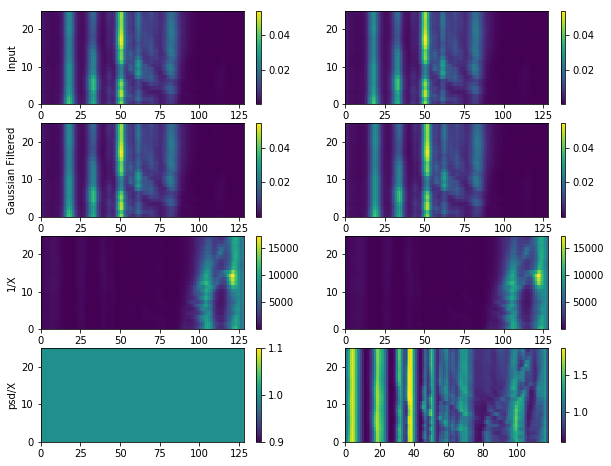

In [7]:
n_plots = 5
filter_sigma =0.001
shift = 1

fig = plt.figure(figsize=(10,10))


#### Inputs ####
ax = fig.add_subplot(n_plots,2,1)
c = ax.pcolor(psd_c)
plt.colorbar(c)
ax.set_ylabel('Input')
ax = fig.add_subplot(n_plots,2,2)
c = ax.pcolor(psd_c)
plt.colorbar(c)

#### Inputs ####
ax = fig.add_subplot(n_plots,2,3)
tmp = gaussian_filter1d(psd_c, sigma=filter_sigma, mode='nearest', axis=1)
c = ax.pcolor(tmp)
plt.colorbar(c)
ax.set_ylabel('Gaussian Filtered')
ax = fig.add_subplot(n_plots,2,4)
tmp = np.roll(psd_c,shift,axis=1)
c = ax.pcolor(tmp)
plt.colorbar(c)


ax = fig.add_subplot(n_plots,2,5)
tmp = 1/ gaussian_filter1d(psd_c, sigma=filter_sigma, mode='nearest', axis=1)
c = ax.pcolor(tmp)
plt.colorbar(c)
ax.set_ylabel('1/X')
ax = fig.add_subplot(n_plots,2,6)
# tmp = psd_c/ gaussian_filter1d(psd_c, sigma=filter_sigma, mode='nearest', axis=1)
tmp = 1/np.roll(psd_c,shift,axis=1)
c = ax.pcolor(tmp)
plt.colorbar(c)


ax = fig.add_subplot(n_plots,2,7)
tmp = psd_c/ gaussian_filter1d(psd_c, sigma=filter_sigma, mode='nearest', axis=1)
c = ax.pcolor(tmp)
plt.colorbar(c)
ax.set_ylabel('psd/X')
ax = fig.add_subplot(n_plots,2,8)
# tmp = psd_c/ gaussian_filter1d(psd_c, sigma=filter_sigma, mode='nearest', axis=1)
tmp = psd_c/np.roll(psd_c,shift,axis=1)
c = ax.pcolor(tmp[:,10:])
plt.colorbar(c)

plt.show()



## Division Test

This is just a test to visualize what the division actually does. It seems that it highlights very small values and ignores larger ones. The smaller the shift the higher is its sensitivity to small values.

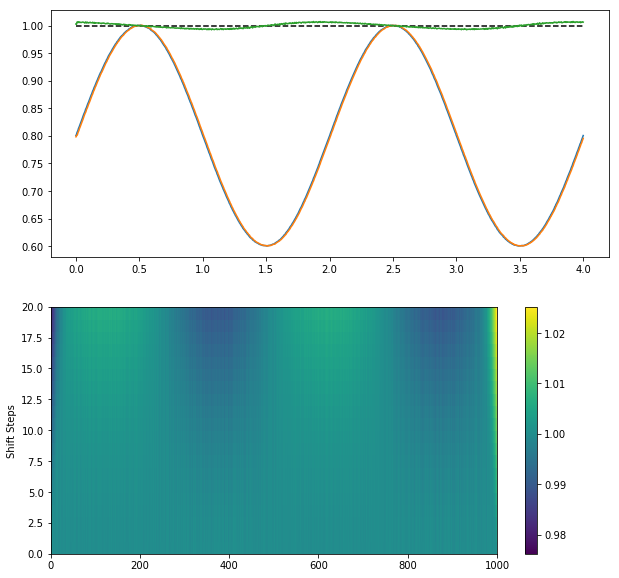

In [5]:
# %%
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

x = np.linspace(0,4,1000)

y = np.sin(x*np.pi)*0.2+0.8+np.random.random(x.shape)*0.001
ax.plot(x,y)
y_shifted = np.roll(y,2)
ax.plot(x,y_shifted)
ax.plot(x,y/y_shifted)
ax.hlines(1,0,4,linestyle='--')


trials = 20
data = np.zeros((trials,1000))

ax = fig.add_subplot(2,1,2)
# ax.plot(x,y)
for i in range(trials):
    y_shifted = gaussian_filter1d(y, sigma=i+1, mode='nearest', axis=0)
    data[i,:] = y/y_shifted

c = ax.pcolor(data)
ax.set_ylabel('Shift Steps')
plt.colorbar(c)
plt.show()

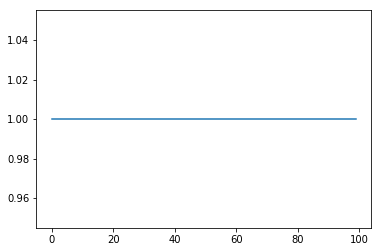

In [6]:
x = np.ones((100,1))

plt.plot( gaussian_filter1d(x, sigma=1, mode='nearest', axis=0))
